# (Dataset Exploration Title)
## by (Abdullah Alkhalifah)

## Preliminary Wrangling

In this dataset, i am going to explore types of Loans , who are the borrowers , what kind of borrowers tend to have ProsperLoans , rates and specificaly ProsperLoans. This dataset contains both categorical and numerical variables. It has a large number of variables, so i am going to use only those important for analysis and visualization. For assessing part, i think this dataset is near perfection and don't need to be assessed. I might drop some empty values and rename some odd column names.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sb
import sys # I used sys to install pywaffle by using the following code : !{sys.executable} -m pip install pywaffle
import pywaffle
import matplotlib.pyplot as plt
%matplotlib inline


<span style = "color: red"> *(Questions are answered after loading and cleaning the dataset down below.)*</span>


In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Let's have and overview on columns of this dataset 
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
#Shape ?

df.shape

(113937, 81)

In [6]:
#Let's checkout null values
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
#Checking on duplicates ..

df.duplicated().sum()

0

#### In my prespective, Due to existence of useless columns i think i am going to drop some useless columns than i don't need


#### Columns i am going to use:
    1-Term :The length of the loan expressed in months.
    
    2-LoanStatus:The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, 
    FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
    
    3-BorrowerAPR:The Borrower's Annual Percentage Rate (APR) for the loan.
    
    4-BorrowerRate:The Borrower's interest rate for this loan. 
    
    5-ProsperRating (Alpha):The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
    
    6-ProsperScore:A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the 
    best, or lowest risk score.  Applicable for loans originated after July 2009.
    
    7-EmploymentStatus:The employment status of the borrower at the time they posted the listing.
    
    8-EmploymentStatusDuration:The length in months of the employment status at the time the listing was created.
    
    9-IsBorrowerHomeowner:A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
    
    10-MonthlyLoanPayment:The scheduled monthly loan payment.
    
    11-ListingCategory:The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
    
    12-IncomeRange: The income range of the borrower at the time the listing was created.
    
    13-IncomeVerifiable:The borrower indicated they have the required documentation to support their income.
    
    14-StatedMonthlyIncome:The monthly income the borrower stated at the time the listing was created.
    
    15-LoanOriginalAmount: The origination amount of the loan.
    
    16-Investors: The number of investors that funded the loan.
    
    18-ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
    

In [8]:
#Columns i am going to use 
columns = ['Term','LoanStatus' , 'BorrowerAPR' , 'BorrowerRate' ,'ProsperRating (Alpha)' , 'EmploymentStatus',
'EmploymentStatusDuration', 'IsBorrowerHomeowner','ProsperScore' ,'ListingCategory (numeric)' ,  'IncomeRange' , 'IncomeVerifiable' , 'StatedMonthlyIncome' 
,  'LoanOriginalAmount' ,'MonthlyLoanPayment', 'Investors']

In [9]:
#dfs stands for dataframe specific
dfs = df[columns].copy()

dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   EmploymentStatus           111682 non-null  object 
 6   EmploymentStatusDuration   106312 non-null  float64
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  IncomeRange                113937 non-null  object 
 11  IncomeVerifiable           113937 non-null  bool   
 12  StatedMonthlyIncome        113937 non-null  float64
 13  LoanOriginalAmount         11

## Visualizations need completely cleaned data, So i am going to drop all null values, rename some columns and replace some values !.

In [10]:
dfs.dropna(inplace = True)

In [11]:
#Check

print(dfs.info())

print('\n----------------\n{}: rows remained '.format(dfs.shape[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Term                       84834 non-null  int64  
 1   LoanStatus                 84834 non-null  object 
 2   BorrowerAPR                84834 non-null  float64
 3   BorrowerRate               84834 non-null  float64
 4   ProsperRating (Alpha)      84834 non-null  object 
 5   EmploymentStatus           84834 non-null  object 
 6   EmploymentStatusDuration   84834 non-null  float64
 7   IsBorrowerHomeowner        84834 non-null  bool   
 8   ProsperScore               84834 non-null  float64
 9   ListingCategory (numeric)  84834 non-null  int64  
 10  IncomeRange                84834 non-null  object 
 11  IncomeVerifiable           84834 non-null  bool   
 12  StatedMonthlyIncome        84834 non-null  float64
 13  LoanOriginalAmount         84834 non-null  in

In [12]:
dfs.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,ProsperScore,ListingCategory (numeric),IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
1,36,Current,0.12016,0.0920,A,Employed,44.0,False,7.0,2,"$50,000-74,999",True,6125.000000,10000,318.93,1
3,36,Current,0.12528,0.0974,A,Employed,113.0,True,9.0,16,"$25,000-49,999",True,2875.000000,10000,321.45,158
4,36,Current,0.24614,0.2085,D,Employed,44.0,True,4.0,2,"$100,000+",True,9583.333333,15000,563.97,20
5,60,Current,0.15425,0.1314,B,Employed,82.0,True,10.0,1,"$100,000+",True,8333.333333,15000,342.37,1
6,36,Current,0.31032,0.2712,E,Employed,172.0,False,2.0,1,"$25,000-49,999",True,2083.333333,3000,122.67,1


In [13]:
#Renaming odd coluumns 
dfs.rename(columns = {'ProsperRating (Alpha)' : 'ProsperRating' ,'ListingCategory (numeric)' : 'ListingCategory'  } 
           , inplace = True)

In [14]:
dfs['ListingCategory'] = dfs['ListingCategory'].astype(object)

#This dictionary contains all categories indexed with it's numeric value
tempdic = { 0 : 'Not Available',1 : 'Debt Consolidation',2 : 'Home Improvement',3 : 'Business',4 : 'Personal Loan',
5 : 'Student Use',6 : 'Auto',7 : 'Other',8 : 'Baby&Adoption', 9 : 'Boat',10: 'Cosmetic Procedure',
11: 'Engagement Ring',12: 'Green Loans',13: 'Household Expenses',14: 'Large Purchases',15: 'Medical/Dental'
    ,16: 'Motorcycle',17: 'RV',18: 'Taxes',19: 'Vacation', 20: 'Wedding Loans'}

#replacing values recursively !
index = 0
def recursivereplace(index):
    if index == len(tempdic):
        return
    dfs['ListingCategory'].replace(index , tempdic[index] , inplace = True)
    index+=1
    recursivereplace(index)

recursivereplace(index)

In [15]:
#Checking !
dfs.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,ProsperScore,ListingCategory,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
1,36,Current,0.12016,0.0920,A,Employed,44.0,False,7.0,Home Improvement,"$50,000-74,999",True,6125.000000,10000,318.93,1
3,36,Current,0.12528,0.0974,A,Employed,113.0,True,9.0,Motorcycle,"$25,000-49,999",True,2875.000000,10000,321.45,158
4,36,Current,0.24614,0.2085,D,Employed,44.0,True,4.0,Home Improvement,"$100,000+",True,9583.333333,15000,563.97,20
5,60,Current,0.15425,0.1314,B,Employed,82.0,True,10.0,Debt Consolidation,"$100,000+",True,8333.333333,15000,342.37,1
6,36,Current,0.31032,0.2712,E,Employed,172.0,False,2.0,Debt Consolidation,"$25,000-49,999",True,2083.333333,3000,122.67,1


## I've checked the csv file description of each column, overall no datatypes changes needed.



===================================================================================================

### What is the structure of your dataset?

It's a csv file containing 81 columns and 113937 rows which describes prosper-peer to peer- loans by providing categorical and numerical values for each attribute for each loan. But after specifying columns, the remaining columns are 16 columns
### What is/are the main feature(s) of interest in your dataset?

> The most interesting part of this dataset is how it reflects reality, it gives the opportunity to deal with an enormous amount of critical data of each loan. It grants flexibility for analyst to choose between 81 rows and eliminate bunch off if necessary. I think Listing Category would achieve a big role in next phases !

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the most interested feature is "LoanOriginalAmount", "StatedMonthlyIncome". Also i think the current state of borrower would help alot, his current job , saray  and barely any attribute that i've choosen to deal with.

In [16]:
dfs.sample(10)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,ProsperScore,ListingCategory,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
64564,36,Current,0.25424,0.2199,D,Employed,114.0,True,6.0,Debt Consolidation,"$25,000-49,999",True,3683.333333,6539,249.69,44
13668,36,Chargedoff,0.37453,0.3500,E,Part-time,65.0,False,6.0,Student Use,"$25,000-49,999",True,2250.000000,3000,135.71,68
33924,36,Completed,0.22456,0.1874,C,Employed,25.0,True,5.0,Debt Consolidation,"$50,000-74,999",True,5408.333333,5500,200.89,10
61913,36,Current,0.35356,0.3134,HR,Employed,312.0,True,2.0,Debt Consolidation,"$25,000-49,999",True,2666.666667,4000,172.76,34
110729,36,Completed,0.07439,0.0710,AA,Full-time,67.0,True,10.0,Debt Consolidation,"$50,000-74,999",True,6000.000000,5000,152.84,163
12927,36,Current,0.13124,0.1029,A,Employed,6.0,False,7.0,Debt Consolidation,"$1-24,999",True,1666.666667,3000,97.21,1
88279,36,Completed,0.29933,0.2759,D,Full-time,25.0,False,7.0,Business,"$50,000-74,999",True,5166.666667,2000,82.28,78
69263,36,Completed,0.15324,0.1249,A,Full-time,207.0,True,6.0,Business,"$25,000-49,999",True,2916.666667,5000,167.24,64
35265,60,Past Due (>120 days),0.26128,0.2359,D,Employed,69.0,False,5.0,Household Expenses,"$25,000-49,999",True,3083.333333,4500,128.39,1
64207,36,Current,0.22362,0.1899,C,Full-time,235.0,False,7.0,Home Improvement,"$50,000-74,999",True,4416.666667,7000,256.56,26


# <span style = "color: red">Univariate Exploration </span>



## Uni/1: EmployementStatus

In [17]:
#For the first visualization i am going to consider "EmploymentStatus"
dfs['EmploymentStatus'].value_counts()

Employed         67309
Full-time         7917
Self-employed     4536
Other             3800
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [18]:
#This code helps us sort the barts inorder
order = dfs['EmploymentStatus'].value_counts().index

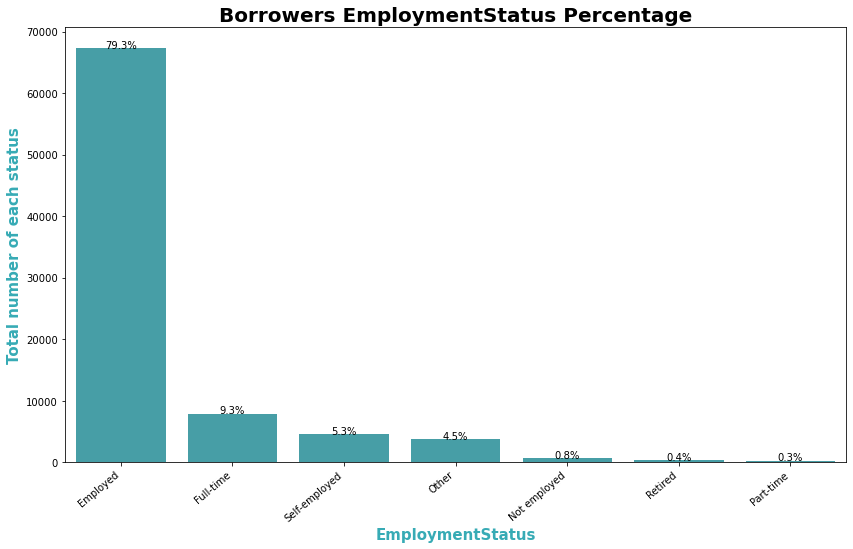

In [20]:
#This code helps us sort the barts inorder
order = dfs['EmploymentStatus'].value_counts().index


figure1 = plt.subplots(figsize = (14,8))
figure1 = sb.countplot(data = dfs , x = 'EmploymentStatus' , order = order , color =  sb.color_palette("husl", 9)[5])
figure1.set_xticklabels(figure1.get_xticklabels(), rotation=40, ha="right")

locs, labels = plt.xticks(rotation=40) 

#set x axis title
figure1.set_xlabel('EmploymentStatus' , size = 15 , color = sb.color_palette("husl", 9)[5] , weight = 'bold')
#set y axis title
figure1.set_ylabel('Total number of each status' , size = 15 , color = sb.color_palette("husl", 9)[5] , weight = 'bold')
#set figure title
figure1.set_title('Borrowers EmploymentStatus Percentage' , size = 20 , color = 'black' , weight = 'bold')


#This variable saves each status it's number of occurance
types_count = dfs['EmploymentStatus'].value_counts()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = types_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/dfs.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    


As we can see from figure above, I've fetched on EmploymentStatus and we can conclude the following:
    
       1- Employed has the highest percentage above all Status with 79.3%
       2- Full-time is far below at the second place with 9.3%
       3- Self-employed with 5.3%
       4- Other with 4.5% which is close to self-employed
       5- Not Employed 0.8%
       6- Retired with 0.4%
       7- At the last we got part-time employees with 0.3% 
       
==================================================================================================       
## Uni/2: (employee vs non employee)      




<span style = "color: red"> *Note: I've added retired to calculation since Retired individual is an ex-employee*</span>

In [21]:
# temp dataframe that's only used to create the figure down below !
temp = dfs.copy()

#This line of code used to declare a new column that takes only two values : employed / not employed !
temp['employmentType'] = np.nan
print(temp.columns)

#This loop is used to insert values to the new column initiated above !
for i in range(dfs.shape[0]):
    if temp.EmploymentStatus.iloc[i] == 'Not employed':
        temp['employmentType'].iloc[i] = 'Not employed'
        
    else:
        temp['employmentType'].iloc[i] = 'employed'


Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'ProsperScore', 'ListingCategory', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'Investors', 'employmentType'],
      dtype='object')


C:\Users\bdbdk\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


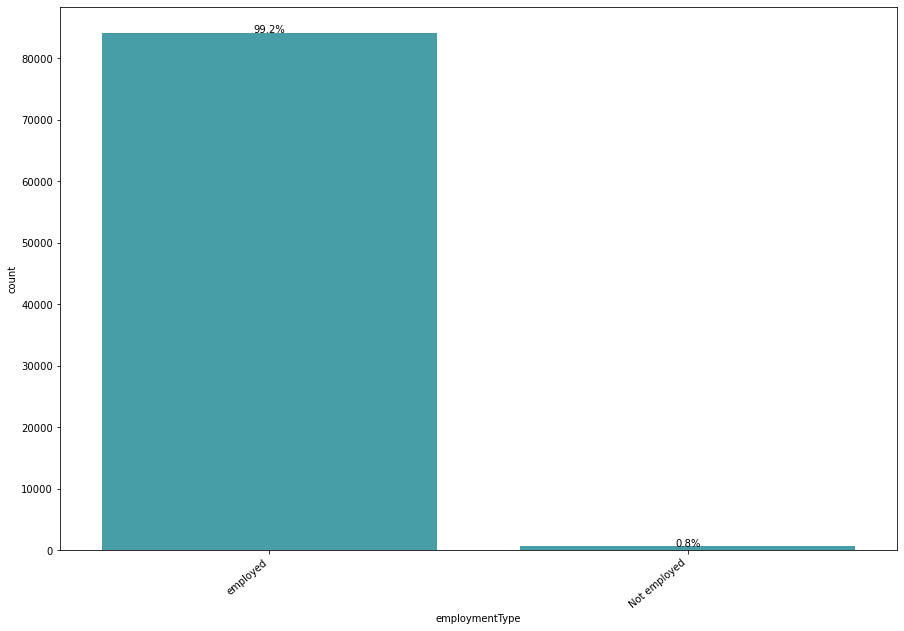

In [24]:

figure2 = plt.subplots(figsize = (15 , 10))
figure2 = sb.countplot(data = temp , x = 'employmentType' , color =  sb.color_palette("husl", 9)[5] )
figure2.set_xticklabels(figure2.get_xticklabels(), rotation=40, ha="right")

types_count1 = temp['employmentType'].value_counts()

locs, labels = plt.xticks(rotation=40) 

for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = types_count1[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/dfs.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

From figure above we can conclude that 99.8% of borrowers are employees which is considered enormous percentage. In the other hand, only 0.8% of borrowers are considered non employees or they never had a job before.

==================================================================================================
## Uni/3 : (EmploymentStatusDuration)

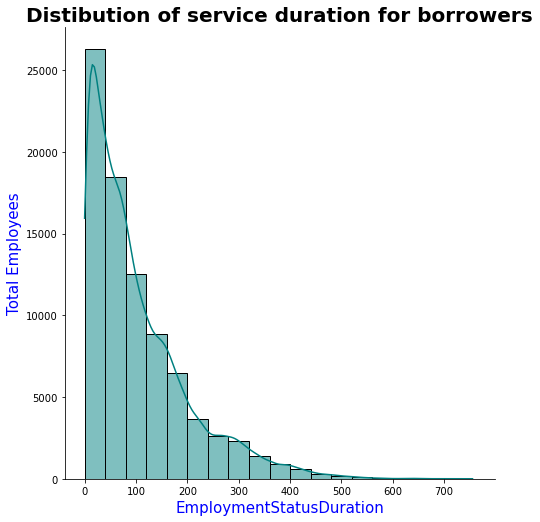

In [25]:

binsize = 40 
bins = np.arange(0, dfs['EmploymentStatusDuration'].max() + binsize, binsize);

figure3 = sb.displot(data = dfs , x = 'EmploymentStatusDuration' , kde = True , color ='teal'
                     , bins = bins ,height = 7);
#Figure size

#Let's specify the column names 

#set x axis title
plt.xlabel('EmploymentStatusDuration' , size = 15 , color = 'blue' );
#set y axis title
plt.ylabel('Total Employees' , size = 15 , color = 'blue');
#set figure title
plt.title('Distibution of service duration for borrowers' , size = 20 , color = 'black' , weight = 'bold');

plt.show();

As we can see from distribution above, it's a right skewed distribution. We can conclude the following:
Mean >Median 


In [26]:
printword = 'Median of distribution is {} and Mean of distribution is {}'.format(dfs.EmploymentStatusDuration.median() , dfs.EmploymentStatusDuration.mean())
print(printword , '\n==================\nIs Mean > Median?')
dfs.EmploymentStatusDuration.median() < dfs.EmploymentStatusDuration.mean()

Median of distribution is 74.0 and Mean of distribution is 103.05531980102317 
Is Mean > Median?


True

In [27]:
dfs.EmploymentStatusDuration.describe()

count    84834.000000
mean       103.055320
std         97.078884
min          0.000000
25%         30.000000
50%         74.000000
75%        148.000000
max        755.000000
Name: EmploymentStatusDuration, dtype: float64

##### We conclude that 75% of employees (has worked or has been working) under or equal to 148 months ~~ 12 years.

####  The eldest employee has worked for 755 month  ~~ 62 years which sounds imposible, but after simple google search i found an article which talks about a man who served for 60 years,
Sources : https://www.freep.com/story/news/columnists/jim-schaefer/2016/02/20/few-minutes-man-who-worked-60-years/80659270/

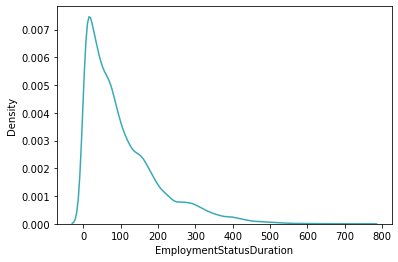

In [28]:
#Here is a simple figure that shows only kde without a hist
fig1 = sb.kdeplot(data=dfs.EmploymentStatusDuration , color = sb.color_palette("husl", 9)[5] )


==================================================================================================
## Uni/4: (LoanStatus)

In [29]:
print(dfs.LoanStatus.value_counts())

dfs.LoanStatus.value_counts().sum()



Current                   56566
Completed                 19657
Chargedoff                 5334
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64


84834

In [30]:
#In this line of code, I must get the percentage of each LoanStatus because waffle plot does not accept raw large numbers !
56566/84834 * 100  + 19657/84834*100 + 5334/84834*100 + 1005/84834 * 100 
+ 806/84834*100 + 363/84834*100 + 313/84834*100 + 304/84834*100 + 265/84834*100 + 205/84834*100 + 16/84834*100 - 0.00000000000001  

2.6781714878468437

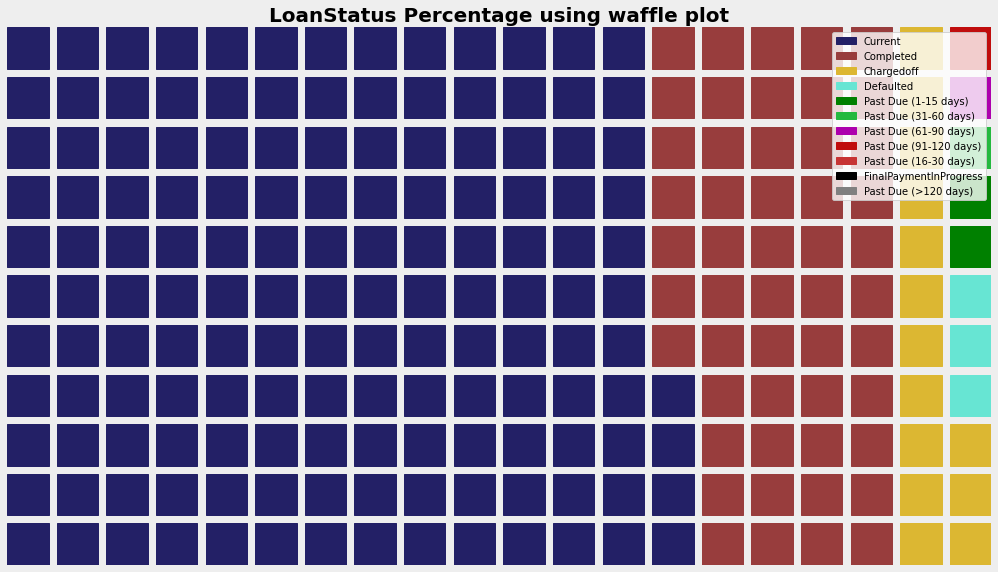

In [31]:
from pywaffle import Waffle

#     colors=('#232066' , '#983D3D' , '#DCB732' , '#67e5d3' , '#1a1384' , '#24b93f' , '#d1a51a' , '#c00d0d' , '#808000' 
#            , '#000000' , '#808080' ),


#list containing all vales percentage of loan statu, formula: (value)/shape[0]*100 = **%
listofvals = [56566/84834 * 100  , 19657/84834*100 , 5334/84834*100 , 1005/84834 * 100 , 806/84834*100 , 363/84834*100 
              , 313/84834*100 , 304/84834*100 , 265/84834*100 , 205/84834*100 , 16/84834*100   ]

dicdata = {'Current': listofvals[0], 
           'Completed': listofvals[1],
           'Chargedoff':listofvals[2],
           'Defaulted' : listofvals[3],         
           'Past Due (1-15 days)': listofvals[4],        
           'Past Due (31-60 days)': listofvals[5],       
           'Past Due (61-90 days)': listofvals[6],       
           'Past Due (91-120 days)' : listofvals[7],     
           'Past Due (16-30 days)' : listofvals[8],       
           'FinalPaymentInProgress': listofvals[9],      
           'Past Due (>120 days)' : listofvals[10]
          }



data = dicdata
fig = plt.figure(
    figsize=(14,8),
    FigureClass=Waffle, 
    rows=11,
    columns = 20,
    values=data, 
    colors=('#232066' , '#983D3D' , '#DCB732' , '#67e5d3' , '#008000' , '#24b93f' , '#ad00ad' , '#c00d0d' , '#c73333' 
          , '#000000' , '#808080' ),
   
)
plt.title('LoanStatus Percentage using waffle plot' , size = 20 , color = 'black' , weight = 'bold'  )

fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show();


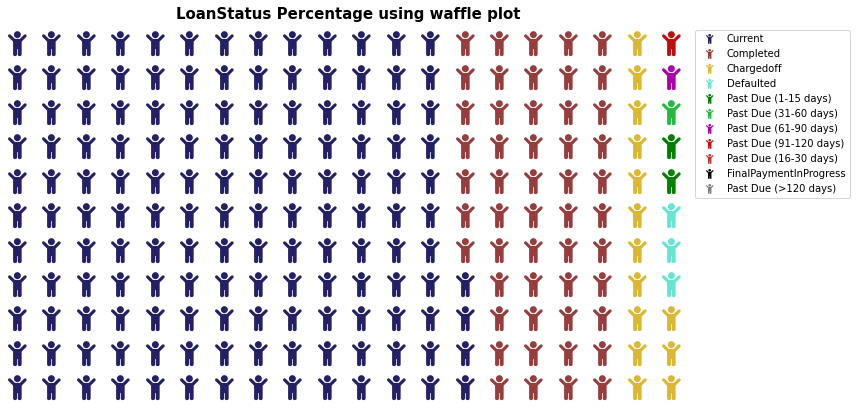

In [32]:
from pywaffle import Waffle

#     colors=('#232066' , '#983D3D' , '#DCB732' , '#67e5d3' , '#1a1384' , '#24b93f' , '#d1a51a' , '#c00d0d' , '#808000' 
#            , '#000000' , '#808080' ),


#list containing all vales percentage of loan statu, formula: (value)/shape[0]*100 = **%
listofvals = [56566/84834 * 100  , 19657/84834*100 , 5334/84834*100 , 1005/84834 * 100 , 806/84834*100 , 363/84834*100 
              , 313/84834*100 , 304/84834*100 , 265/84834*100 , 205/84834*100 , 16/84834*100]

dicdata = {'Current': listofvals[0], 
           'Completed': listofvals[1],
           'Chargedoff':listofvals[2],
           'Defaulted' : listofvals[3],         
           'Past Due (1-15 days)': listofvals[4],        
           'Past Due (31-60 days)': listofvals[5],       
           'Past Due (61-90 days)': listofvals[6],       
           'Past Due (91-120 days)' : listofvals[7],     
           'Past Due (16-30 days)' : listofvals[8],       
           'FinalPaymentInProgress': listofvals[9],      
           'Past Due (>120 days)' : listofvals[10]
          }


#This figure has different icons 

data =dicdata
fig = plt.figure(
    figsize=(12,8),
    FigureClass=Waffle, 
    rows=11,
    columns = 20,
    values=data, 
   colors=('#232066' , '#983D3D' , '#DCB732' , '#67e5d3' , '#008000' , '#24b93f' , '#ad00ad' , '#c00d0d' , '#c73333'
           , '#000000' , '#808080' ),
   
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=25, 
    icon_legend=True
)

plt.title('LoanStatus Percentage using waffle plot' , size = 15 , color = 'black' , weight = 'bold'  );

plt.show();

In [33]:
for _ in listofvals:
    print(_)

66.67845439328572
23.171134215055282
6.2875733785982035
1.1846665252139472
0.9500907654949666
0.42789447627130633
0.36895584317608504
0.35834688921894525
0.31237475540467263
0.24164839569040716
0.018860362590470803


#### We can conclude the following: 
     
    1- 66.6% of LoanStatus are under time validation

    2- 23.17% are 'completed' 

    3- 6.28% are 'charged off'

    4- only 1.1% are 'defaulted'.


<span style = "color: red"> *Note: The rest of status only form a small percentage equals to 2.64% overall*</span>



==================================================================================================


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### <span style = "color: red">Until now i could not find any unusual points, It might be the columns i chose did not have such as outliers, But good to remark that i found one surprisingly outlier value in 'EmploymentStatusDuration' which was 62 years of servic, but after some google search i found out there are use cases such as this.
</span>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


#### <span style = "color: red">Yes i did. I've  removed unwanted/unuseful columns that i do not need. I've also dropped every null value which might sound ridiculous, but in my point of view i think removing is the best solution rather than replacing. 
</span>


==================================================================================================

# <span style = "color: red"> Bivariate Exploration </span>



## Biv/1: (OriginalLoanAmount / MonthlyLoanPayment)

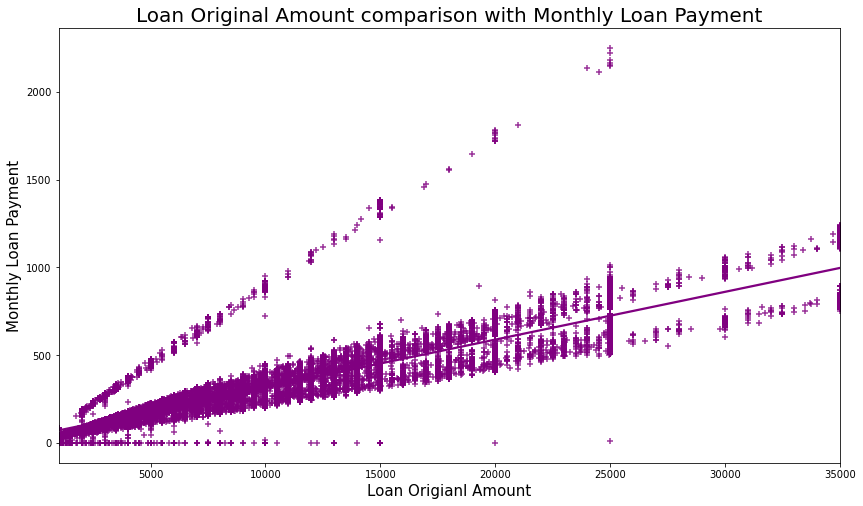

In [36]:
fig = plt.subplots(figsize = [14,8]);

#regplot is a seaborn plot function that plots a scatter plot includes a regression line
fig = sb.regplot(data = dfs , x = 'LoanOriginalAmount' , y = 'MonthlyLoanPayment' , marker="+" , color = 'purple');

# X-axis label
fig.set_xlabel('Loan Origianl Amount' , size = 15 , color = 'black' );

# Y-axis label
fig.set_ylabel('Monthly Loan Payment' ,  size = 15 , color = 'black' );

# Title name
fig.set_title('Loan Original Amount comparison with Monthly Loan Payment' , size = 20 , color = 'black' );

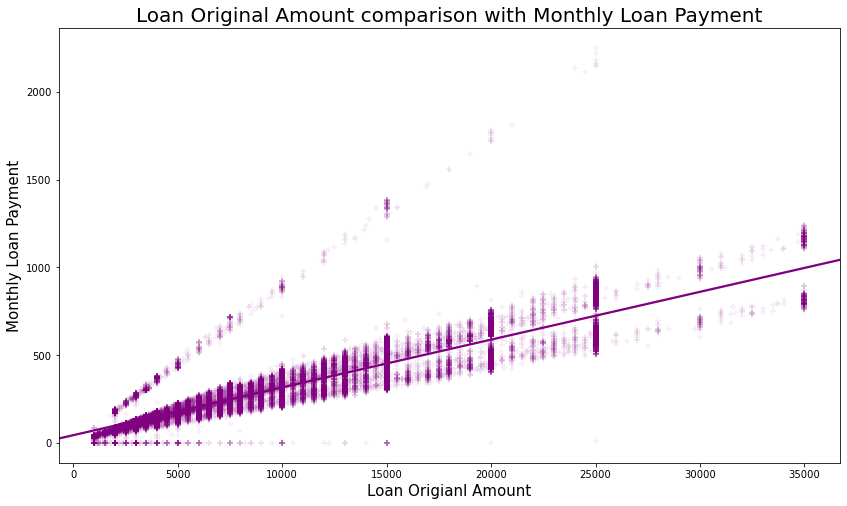

In [37]:
fig = plt.subplots(figsize = (14,8));

fig = sb.regplot(data = dfs , x = 'LoanOriginalAmount' , y = 'MonthlyLoanPayment' , marker="+", x_jitter = 0.3 ,
                 truncate=False , scatter_kws={'alpha':1/15} , color = 'purple');

# X-axis label
fig.set_xlabel('Loan Origianl Amount' , size = 15 , color = 'black' );

# Y-axis label
fig.set_ylabel('Monthly Loan Payment' ,  size = 15 , color = 'black' );

# Title name
fig.set_title('Loan Original Amount comparison with Monthly Loan Payment' , size = 20 , color = 'black' );


<span style = "color: red">Note: since the trend looks like a</span> **$\log(y)$** **∝** X <span style = "color: red">relationship (that is, linear increases in the value of x are associated with linear increases in the </span> **$\log(y)$** <span style = "color: red">, plotting the regression line on the raw units is not appropriate.</span>


down below:

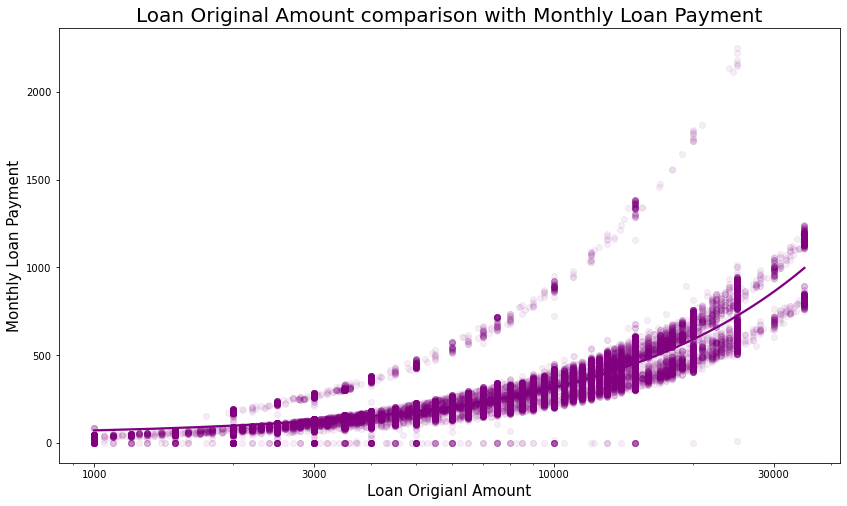

In [38]:


fig = plt.subplots(figsize = (14,8))

fig = sb.regplot(data = dfs , x = 'LoanOriginalAmount' , y = dfs['MonthlyLoanPayment'] , color = 'purple' , x_jitter = 0.4, 
                 scatter_kws={'alpha':1/15})

# X-axis label
fig.set_xlabel('Loan Origianl Amount' , size = 15 , color = 'black' )

# Y-axis label
fig.set_ylabel('Monthly Loan Payment' ,  size = 15 , color = 'black' )

# Title name
fig.set_title('Loan Original Amount comparison with Monthly Loan Payment' , size = 20 , color = 'black' )


plt.xscale('log')

xticks = [1000 , 3000 , 10000 ,30000 ]

xlabels = ['{:1.0f}'.format(label) for label in xticks]
plt.xticks(xticks , xlabels)

plt.show()

In [39]:
#In this line of code , Pearson correlation coefficient is calculated.
x_axis = np.array(dfs['LoanOriginalAmount'])
y_axis = np.array(dfs['MonthlyLoanPayment'])
pcc = np.corrcoef(x_axis, y_axis)
pcc

array([[1.        , 0.91648932],
       [0.91648932, 1.        ]])

<span style = "color: red">We conclude: The regression line in the scatter plot showing a positive , strong correlation between the two variables
with Pearson correlation coefficient equals to 0.916.   </span>

**We could tell that the more the Loan Original Amount is, the more borrower pay off.**

In [40]:
dfs.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,ProsperScore,ListingCategory,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
1,36,Current,0.12016,0.0920,A,Employed,44.0,False,7.0,Home Improvement,"$50,000-74,999",True,6125.000000,10000,318.93,1
3,36,Current,0.12528,0.0974,A,Employed,113.0,True,9.0,Motorcycle,"$25,000-49,999",True,2875.000000,10000,321.45,158
4,36,Current,0.24614,0.2085,D,Employed,44.0,True,4.0,Home Improvement,"$100,000+",True,9583.333333,15000,563.97,20
5,60,Current,0.15425,0.1314,B,Employed,82.0,True,10.0,Debt Consolidation,"$100,000+",True,8333.333333,15000,342.37,1
6,36,Current,0.31032,0.2712,E,Employed,172.0,False,2.0,Debt Consolidation,"$25,000-49,999",True,2083.333333,3000,122.67,1


==================================================================================================

## Biv/2: ( IncomeVerifiable / StatedMonthlyIncome)

In [41]:
#Let's see if count of 
print(dfs[dfs['IncomeVerifiable'] == True].shape[0] - dfs[dfs['IncomeVerifiable'] == False].shape[0])
print('\n=======================================\n',dfs[dfs['IncomeVerifiable'] == False].shape[0])



70178

 7328


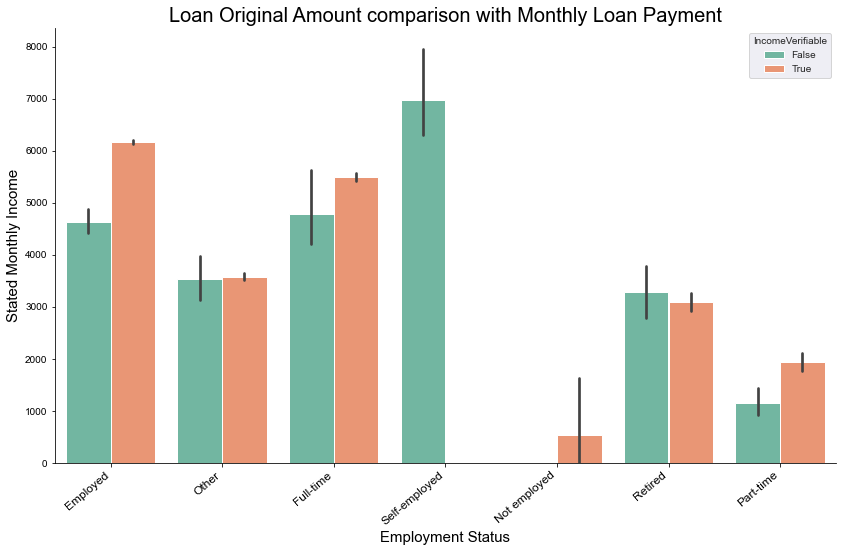

In [42]:
figure = plt.subplots(figsize = (14,8));
figure = sb.set_style('darkgrid');
figure = sb.set_palette('Set2');
figure = sb.barplot(data=dfs, x="EmploymentStatus", y='StatedMonthlyIncome' , hue = 'IncomeVerifiable');

figure.set_xticklabels(figure.get_xticklabels(), rotation=40, ha="right" , size = 12 , color = 'black');


# X-axis label
figure.set_xlabel('Employment Status' , size = 15 , color = 'black' );

# Y-axis label
figure.set_ylabel('Stated Monthly Income' ,  size = 15 , color = 'black' );

# Title name
figure.set_title('Loan Original Amount comparison with Monthly Loan Payment' , size = 20 , color = 'black' );

figure = sb.despine();
plt.show();

**Conclusion: Self employed borrowers have the highest income but they can't verify their income. On the other side, Employees with Verified Income borrowers are on top with approximately 6100 dollars Monthly Income. Full-time( has no income verifiable ) borrowes are on top with approximately 4800 dollars  Monthly Income. While Not employed borrowers have the lowest stated Monthly Income less than 1000. **

$Explaination:$

-Employed (Income Verifiable = True): 6100


-Employed (Income Verifiable = False): 4700

-Other (Income Verifiable = True): 3550

-Other (Income Verifiable = False): 3500

-Full-time (Income Verifiable = True): 5500

-Full-time (Income Verifiable = False): 4800

-Self-Employed (Income Verifiable = True): 0

-Self-Employed (Income Verifiable = False): 7000

-Not employed (Income Verifiable = True): 600

-Not employed (Income Verifiable = False): 0

-Retired (Income Verifiable = True): 3100

-Retired (Income Verifiable = False): 3200

-Part-time (Income Verifiable = True): 1900

-Part-time (Income Verifiable = False): 1100


*Note: All numbers are approximate and not accurate* 

==================================================================================================

## Biv/3: (LoanStatus / HomeownerStatus)

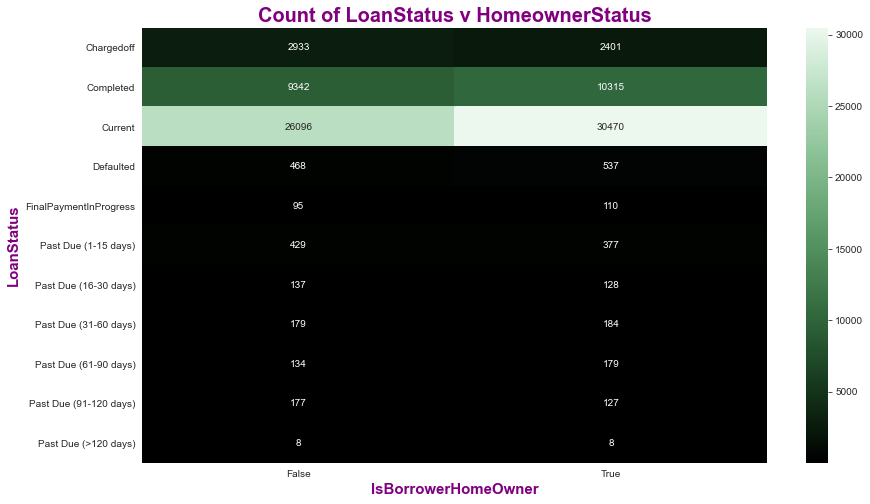

In [43]:
plt.figure(figsize = (14, 8));

# in this line of code , i grouped the columns needed in temp dataframe to plot with
LSIB = dfs.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size();


# in this line of code , i changed the index to count
LSIB = LSIB.reset_index(name = 'count');

#Now let's reform the temp dataframe
LSIB = LSIB.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count');

#Creating heatmap color
tempcolor = sb.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True);


#Creating the heatmap
fig  = sb.heatmap(LSIB, annot = True, fmt = 'd' , cmap = tempcolor);


# x-axis label
fig.set_xlabel('IsBorrowerHomeOwner' , size = 15 , color = 'purple' , weight = 'bold');

# y-axis label
fig.set_ylabel('LoanStatus' , size = 15 , color = 'purple' , weight = 'bold');

#Tile of heatmap
fig.set_title('Count of LoanStatus v HomeownerStatus' , size = 20 , color = 'purple' , weight = 'bold');


In [44]:
# tisbho ~ total Is Borrower Home Owner
tisbho = dfs[dfs['IsBorrowerHomeowner'] == True]['IsBorrowerHomeowner'].count() 
# tisbnho ~ total Is Borrower not Home Owner
tisbnho = dfs[dfs['IsBorrowerHomeowner'] == False]['IsBorrowerHomeowner'].count() 

print(tisbho , tisbnho)
total = tisbho + tisbnho

perc1 = tisbho / total * 100
perc1 , 100-perc1

44836 39998


(52.851451069146805, 47.148548930853195)

**Conclusion: LoanStatus like 'Completed' and 'Current' have the upper hand on the number of borrowers with total of 50,350 for** 
**Current status and 17,741 for Completed status. Good to mention that Home Owners and non Home Owners are close to each other.  Majority of the loan borrowers are employeed on IncomeRange (50,000 - 75,000)**

**%52.85 of Loan borrowers are Home Owners and %47.145 are not**



================================================================================================== 

## Biv/4: (Term / BorrowerRate)

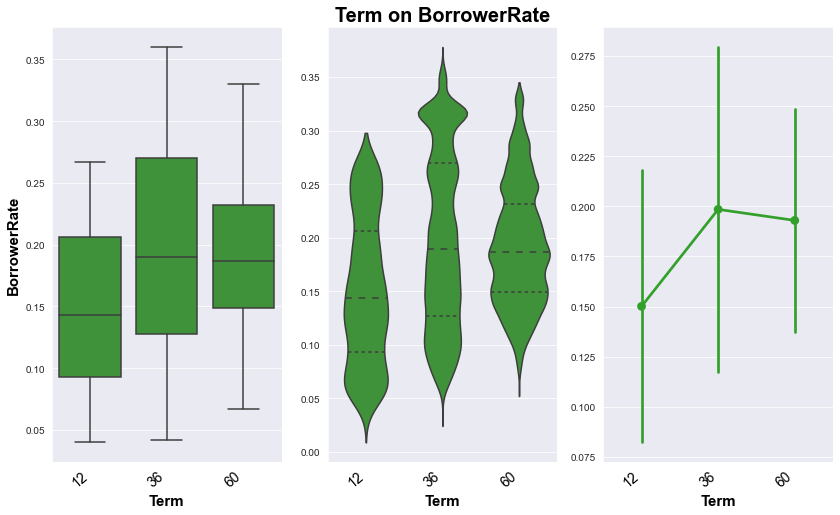

In [45]:
#Plotting Loan amount with loan status
#I've execluded Ranges equal to 0
temp_dfs = dfs[dfs['IncomeRange'] != '$0']



#To adjust the size of the plots
plt.figure(figsize=[14, 8])


#In this line of code, fig1 is in box style
plt.subplot(1,3,1)
fig1 = sb.boxplot(data = temp_dfs , x = 'Term' , y = 'BorrowerRate' , 
           color = sb.color_palette("Paired", 9)[3])


# Axis labels for figure 1
plt.xlabel('Term' , size = 15 , color = 'black' , weight = 'bold')
plt.ylabel('BorrowerRate' , size = 15 , color = 'black' , weight = 'bold')




#In this line of code, fig2 is in violin style
plt.subplot(1,3,2)
fig2 = sb.violinplot(data = temp_dfs , x = 'Term' , y = 'BorrowerRate' , inner = 'quartile' , outliers = False,
              color = sb.color_palette("Paired", 9)[3])

# Axis labels for figure 2
plt.xlabel('Term' , size = 15 , color = 'black' , weight = 'bold')
plt.ylabel('' , size = 15 , color = 'black' , weight = 'bold')
plt.title('Term on BorrowerRate' , size = 20 , color = 'black' , weight = 'bold'  )


#In this line of code, fig3 is in point style
plt.subplot(1,3,3)
fig3 = sb.pointplot(data = temp_dfs , x = 'Term' , y = 'BorrowerRate' , ci = 'sd', outliers = False,
           color = sb.color_palette("Paired", 9)[3])

# Axis labels for figure 3
plt.xlabel('Term' , size = 15 , color = 'black' , weight = 'bold')
plt.ylabel('' , size = 15 , color = 'black' , weight = 'bold')




#Cordinate x-axis in the perfect position
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=40, ha="right" , size = 14 , color = 'black')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=40, ha="right" , size = 14 , color = 'black')
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=40, ha="right" , size = 14 , color = 'black')


plt.show()

#### In line of code below, I've used .describe() to have a sight on accurate values, Hence a better given conclusion.

In [205]:
print((dfs.query('Term == 12')['BorrowerRate']).describe() ,'\n', (dfs.query('Term == 36')['BorrowerRate']).describe() ,'\n', 
     (dfs.query('Term == 60')['BorrowerRate']).describe())

count    1613.000000
mean        0.150123
std         0.067858
min         0.040000
25%         0.092900
50%         0.143400
75%         0.206400
max         0.266900
Name: BorrowerRate, dtype: float64 
 count    58678.000000
mean         0.198545
std          0.081007
min          0.042300
25%          0.127400
50%          0.189900
75%          0.269900
max          0.360000
Name: BorrowerRate, dtype: float64 
 count    24543.000000
mean         0.192992
std          0.055667
min          0.066900
25%          0.149000
50%          0.187000
75%          0.231900
max          0.330400
Name: BorrowerRate, dtype: float64


**Conclusion:**

$Explainaton:$

**12 Months:** 1613 of Borrowers tend to have lower BorrowerRate than other Terms with Max Rate equals to ~~ %27. Taking  Consideration of my simple financial knowledge, The shorter the term the Lower Interst rate. Also, Borrowers who take 12 months term tend to have the financial power to payoff a loan within a year.However, Borrower's interest rate is usually based on their credit score, so the higher their credit score, the better their interest rate.

**36 Months:** 25% (75% to 100%) (14,669 borrower) of 58678 has +0.27 BorrowerRate which is much higher compared to 75% of both Terms 12 and 60. Also it's important to say those 14,669 borrowers have BorrowerRate higher or equal to Borrwers who chose 12 terms, since max BorrowerRate of 12 terms is %266900 ~~ %27


**60 Months:**  25% (75% to 100%) (6,136) of 24543 borrowers tend to have interest rate higher than %23, Hence comes in second place behind those who chosen 36 Months term. 


================================================================================================== 

## Biv/5 (Term / BorrowerARP)


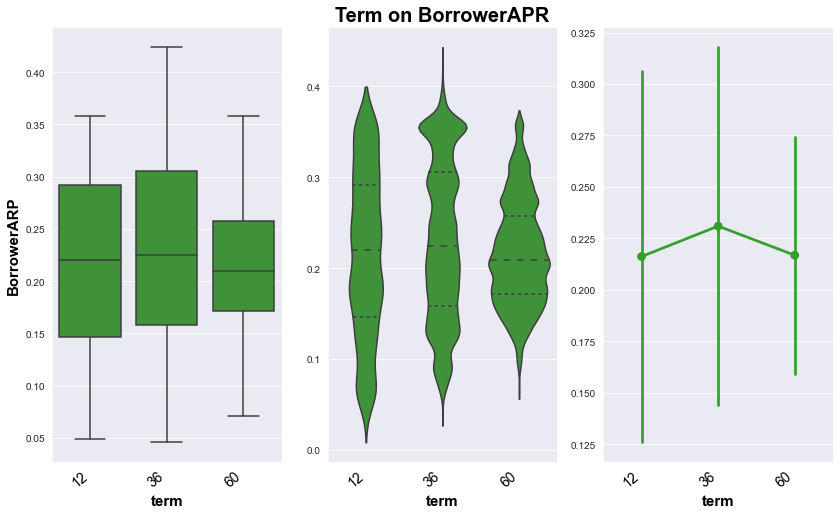

In [46]:
#Plotting Loan amount with loan status
temp_dfs = dfs[dfs['IncomeRange'] != '$0']
#To adjust the size of the plots
plt.figure(figsize = (14,8))




#In this line of code, fig1 is in box style
plt.subplot(1,3,1)
fig1 = sb.boxplot(data = temp_dfs , x = 'Term' , y = 'BorrowerAPR' , 
           color = sb.color_palette("Paired", 9)[3])

# Axis labels for figure 1
plt.xlabel('term' , size = 15 , color = 'black' , weight = 'bold')
plt.ylabel('BorrowerARP' , size = 15 , color = 'black' , weight = 'bold')




#In this line of code, fig2 is in violin style
plt.subplot(1,3,2)
fig2 = sb.violinplot(data = temp_dfs , x = 'Term' , y = 'BorrowerAPR' , inner = 'quartile' , outliers = False,
              color = sb.color_palette("Paired", 9)[3])

# Axis labels for figure 2
plt.xlabel('term' , size = 15 , color = 'black' , weight = 'bold')
plt.ylabel('' , size = 15 , color = 'black' , weight = 'bold')
plt.title('Term on BorrowerAPR' , size = 20 , color = 'black' , weight = 'bold'  )




#In this line of code, fig3 is in point style
plt.subplot(1,3,3)
fig3 = sb.pointplot(data = temp_dfs , x = 'Term' , y = 'BorrowerAPR' , ci = 'sd', outliers = False,
           color = sb.color_palette("Paired", 9)[3])


# Axis labels for figure 3
plt.xlabel('term' , size = 15 , color = 'black' , weight = 'bold')
plt.ylabel('' , size = 15 , color = 'black' , weight = 'bold')


#Cordinate x-axis in the perfect position
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=40, ha="right" , size = 14 , color = 'black')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=40, ha="right" , size = 14 , color = 'black')
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=40, ha="right" , size = 14 , color = 'black')

plt.show()

#Fig1 x-axis labels are in months 

In [47]:
print((dfs.query('Term == 12')['BorrowerAPR']).describe() ,'\n', (dfs.query('Term == 36')['BorrowerAPR']).describe() ,'\n', 
     (dfs.query('Term == 60')['BorrowerAPR']).describe())

count    1613.000000
mean        0.216214
std         0.090263
min         0.049350
25%         0.146630
50%         0.220260
75%         0.291670
max         0.358430
Name: BorrowerAPR, dtype: float64 
 count    58678.000000
mean         0.231045
std          0.086979
min          0.045830
25%          0.158330
50%          0.224660
75%          0.305320
max          0.423950
Name: BorrowerAPR, dtype: float64 
 count    24543.000000
mean         0.216844
std          0.057480
min          0.071110
25%          0.171840
50%          0.209310
75%          0.257180
max          0.358380
Name: BorrowerAPR, dtype: float64


In [48]:
# In this line of code , Calculating the mean of the difference between APR and Interest terms '12'
terms12 = []
templist1 = dfs.query('Term == 12')['BorrowerAPR']
templist2 = dfs.query('Term == 12')['BorrowerRate']

# Loop breaker
counter = 0
def recursiveMean(c):
    #Recursion break condition
    if c == len(templist1):
        return;
    #Appending difference proccess
    terms12.append(templist1.iloc[c] - templist2.iloc[c])
    c+=1
    #recalling function
    recursiveMean(c)
    
recursiveMean(counter)


In [49]:
#Turning list into numpy array
terms12 = np.array(terms12)

#Calculating the mean
terms12mean = terms12.mean()
terms12mean*100

6.6090960942343475

In [50]:
# In this line of code , Calculating the mean of the difference between APR and Interest terms '36'
terms36 = []
templist1 = dfs.query('Term == 36')['BorrowerAPR']
templist2 = dfs.query('Term == 36')['BorrowerRate']

for i in range(len(templist1)):
    terms36.append(templist1.iloc[i] - templist2.iloc[i])



In [51]:
#Turning list into numpy array
terms36 = np.array(terms36)

#Calculating the mean
terms36mean = terms36.mean()


terms36mean*100

3.2499670234159304

In [52]:
index = 0
terms60 = []
templist1 = dfs.query('Term == 60')['BorrowerAPR']
templist2 = dfs.query('Term == 60')['BorrowerRate']

while index < len(templist1):
    terms60.append(templist1.iloc[index] - templist2.iloc[index])
    index+=1


In [53]:
#Turning list into numpy array
terms60 = np.array(terms60)

#Calculating the mean
terms60mean = terms60.mean()

terms60mean*100

2.385185877847044

In [54]:
print(terms12mean*100 , terms36mean*100 , terms60mean*100)

6.6090960942343475 3.2499670234159304 2.385185877847044


**Conclusion:**
APR is broader and a bit higher than BorrowerRate because it is the annual cost of the loan to the borrower including fees and one-time costs.

$Explainaton:$

**12 Months:** APR has rased the total interest from mean equal to 15% to 23% !. Also, Max Interest rate was approximately 27% but after the raise of APR it is now 35% which is 8% more than base borrower interest.

**36 Months:** 25% (75% to 100%) (14,669 borrower) of 58678 has +0.305320 BorrowerAPR which is now close to +75% of Term 12. However, Max BorrowerAPR(Full interest) of term 36 is now higher than Borrower interest of 6% margin difference. 


**60 Months:**  25% (75% to 100%) (6,136) of 24543 borrowers tend to have the lowest APR interest rate with margin +2% than Borrower Interest(Non APR), Hence comes in last place in highest difference but comes in first place for consumer!. 






Margin difference between BorrwerRate (Interest) and BorrowerAPR (APR INTEREST) is : 
    
 *Note: (BorrowerAPR - BorrowerRate).mean()*
   
    12 Months: +6.61% (Highest increase)
    
    36 Months: +3.256% 
    
    60 Months: +2.4% (Lowest increase)
    

==================================================================================================

## Biv/6: (ProsperScore / LoanStatus)

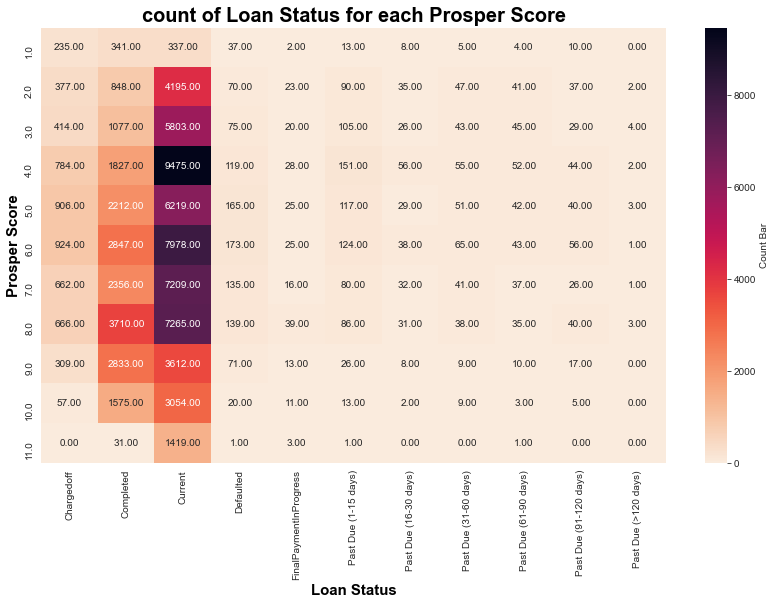

In [55]:

plt.figure(figsize = (14,8))


prls = dfs.groupby(['ProsperScore', 'LoanStatus']).size().reset_index( name = 'count')

prls = prls.pivot( index = 'ProsperScore' , columns= 'LoanStatus', values = 'count')

prls.fillna( value = '0' , inplace=True)


prls = prls[prls.columns].astype(float)



sb.heatmap(prls, cmap='rocket_r' ,  annot = True, fmt = '.2f' , cbar_kws = {'label' : 'Count Bar'});

#Setting axis labels

plt.xlabel('Loan Status' , size = 15 , color = 'black' , weight = 'bold')

plt.ylabel('Prosper Score' , size = 15 , color = 'black' , weight = 'bold')

plt.title('count of Loan Status for each Prosper Score' , size = 20 , color = 'black' , weight = 'bold')


plt.show()

**Conclusion: +8000 Loans that is still running tend to have the lowest ProsperScore amoung other statuses with 4 ProsperScore
and approximately 10000 Loans are between 1.5 and 3.5 ProsperScore.** 

**Other Statuses do not have the high impact as much as 'Current' Status's**

==================================================================================================

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset
Many RelationShip showed intersting results. For example, ProsperScore are almost Low for every Loan with 'Current' Status which is good sign for Loaners/banks. Also the relationship between LoanStatus and IsBorrowerHomeOwner showed some uncommon results. Loans that are'Completed' and 'Current' have 78,091 borrowers.Also, I thought Home Owners will somehow have less loans than others but surprisingly %52.85 of Loan borrowers are Home Owners and %47.145 are not.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The relationship between (BorrowerRate | BorrowerAPR)&Term have taken from me time to analyze the difference between the base interest rate of a loan (Borrower's interest rate is usually based on their credit score, the higher their credit score is, the better their interest rate. The interest rate is only the interest paid to the lender.) and BorrowerAPR (APR is fixed by the lender and includes Lender fees and other costs that vary from one Loaning institution to other) which ends up that those who tends to chose to pay off on 3 years will mostly get affected by the higher ARP Rate according to the dataset and those who chose 3 years will mostly get affected with the lowest ARP interest according to the dataset we have.


==================================================================================================

# <span style = "color: red"> Multivariate Exploration</span>



## Multiv / 0 (Coleration heatmap)

In [56]:
#Numerical Values in a list

numirical_values_list = ['BorrowerRate', 'BorrowerAPR', 'StatedMonthlyIncome','ProsperScore',
                         'MonthlyLoanPayment','LoanOriginalAmount','Investors' ]

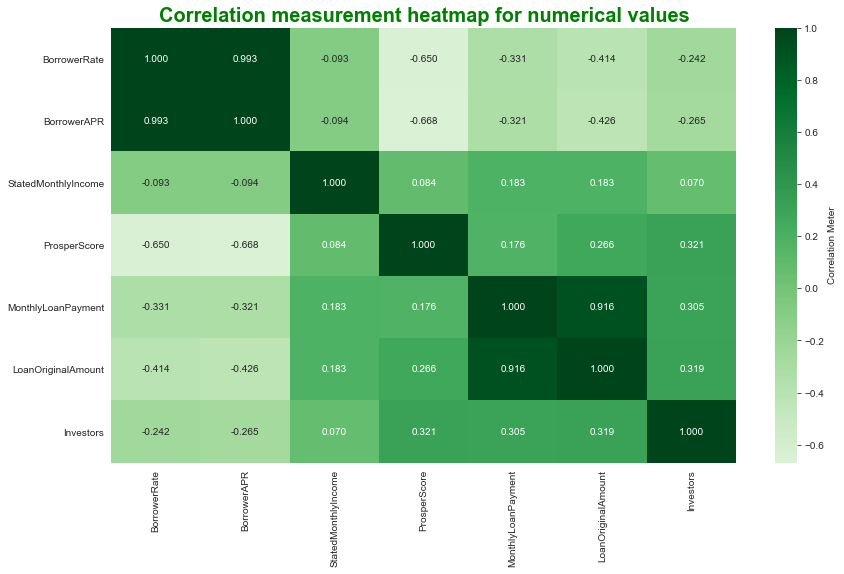

In [58]:

# correlation plot
plt.figure(figsize = [14, 8])
sb.heatmap(dfs[numirical_values_list].corr(), annot = True, fmt = '.3f', cmap = 'Greens', center = 0 
           , cbar_kws = {'label' : 'Correlation Meter'} );

plt.title('Correlation measurement heatmap for numerical values' , size = 20 , color = 'green' , weight = 'bold');
plt.show()

**Conclusion:** 
    
    High Correlation relationships (var1 / var2):
    
    1- BorrowersRate / ProsperScore 
    
    2- BorrowerAPR  / BorrowerRate
    
    3- LoanOriginalAmount / MonthlyLoanPayment 
    
    
    Weak Correlation relationships (var1 / var2):
    
    1- StatedMonthlyIncome / BorrowerAPR



==================================================================================================


## Multiv / 1: (LoanOriginalAmount / MonthlyLoanPayment) for each Listing Category

In [59]:
dfs.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,ProsperScore,ListingCategory,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
83637,36,Completed,0.17192,0.1359,B,Employed,273.0,True,7.0,Home Improvement,"$75,000-99,999",True,6666.666667,3500,118.93,8
39272,36,Chargedoff,0.30532,0.2699,D,Employed,107.0,True,7.0,Other,"$75,000-99,999",True,6252.916667,3500,142.87,39
105984,36,Completed,0.33973,0.2999,HR,Employed,239.0,True,3.0,Other,"$50,000-74,999",True,5302.000000,4000,169.78,1
99873,36,Current,0.16732,0.1314,B,Employed,0.0,False,6.0,Debt Consolidation,"$25,000-49,999",True,2500.000000,4000,135.05,52
108796,60,Completed,0.20081,0.1769,B,Employed,294.0,True,4.0,Debt Consolidation,"$50,000-74,999",True,4666.666667,13500,340.54,1


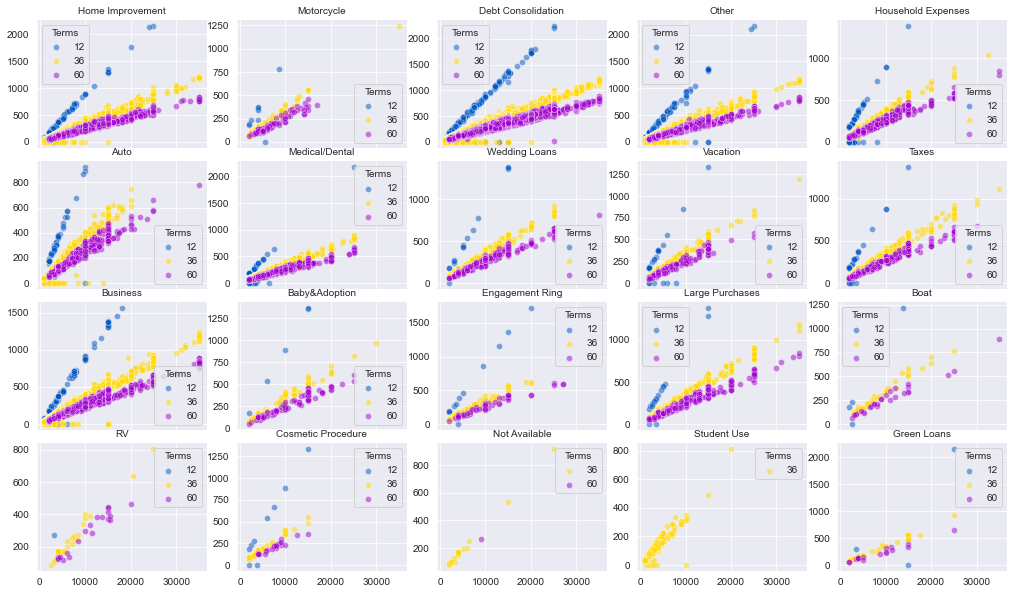

In [60]:
#Creating plates/Facets for each Listing Category
g = sb.FacetGrid(dfs , col = 'ListingCategory' , height = 4 , col_wrap = 5 , hue = 'Term' , sharey = False , palette = 'prism'
                , margin_titles=True)

#Mapping variables to each facet
g.map_dataframe(sb.scatterplot , x = 'LoanOriginalAmount' , y = 'MonthlyLoanPayment' , x_jitter = 0.3 , alpha = 1/2 )


#Setting the size of figures 
g.fig.set_size_inches(14, 8);


#Setting each facet a proper column name !
g.set_titles('{col_name}')

#in this line of code, i will show legend for each plot 

#saving number of Categories in a variable !
legend_number = dfs.ListingCategory.value_counts().shape[0];


for n in range(legend_number):
    g.axes[n].legend(title = 'Terms');
    


In [61]:
dfs.ListingCategory.value_counts()

Debt Consolidation    53167
Other                  9216
Home Improvement       6801
Business               5296
Auto                   2237
Household Expenses     1995
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           770
Vacation                768
Motorcycle              304
Student Use             274
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Not Available            20
Name: ListingCategory, dtype: int64

In [62]:
print(dfs.ListingCategory.value_counts()[0] / dfs.ListingCategory.value_counts().sum()* 100 , '%')

62.67180611547257 %


**Conclusion:** 


*Note: Each Category figure has it's own y axis ticks*


1-Debut Consildation:
    We conclude that Debut Consildation has the highest Loan Original Amounts between other Listing Categories amoung all type of terms exceeding 30,000 Original Loan Amount, It has strong positive correlation relationship for all types of terms. 


2-Home improvements:
    Similar to above, It has strong positive correlation relationship but less MonthlyLoanPayment counts.
    
3-Student use:
    clearly, we could say that Students are limited only to Term = 36 (3 years).

==================================================================================================

## Multiv/2: (LoanOriginalAmount acording to each Employment Status)

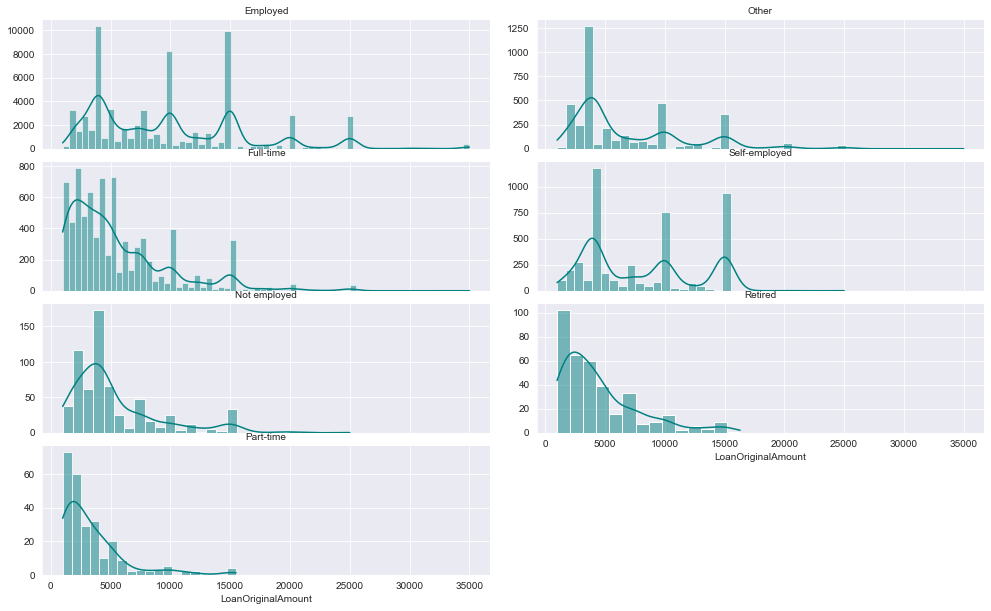

In [65]:
fig = sb.FacetGrid(data = dfs , col = 'EmploymentStatus' , height = 6 , col_wrap = 2,sharey = False);

#Plotting scatter on the top 10 listing categories
fig.map(sb.histplot , 'LoanOriginalAmount' ,color = 'teal' , kde = True );

fig.fig.set_size_inches(14, 8);

#Changing the titles to columns names  
fig.set_titles('{col_name}');



**Conclusion:** Full Time Employeed Borrowers have the highest Loan Original Amount as the graph tells and have the highest number of borrowers While Part-time borrowers are the fewest amoung other Statuses.

==================================================================================================


## Multiv/3: (ProsperRating/EmploymentStatus) comparison on StatedMonthlyIncome


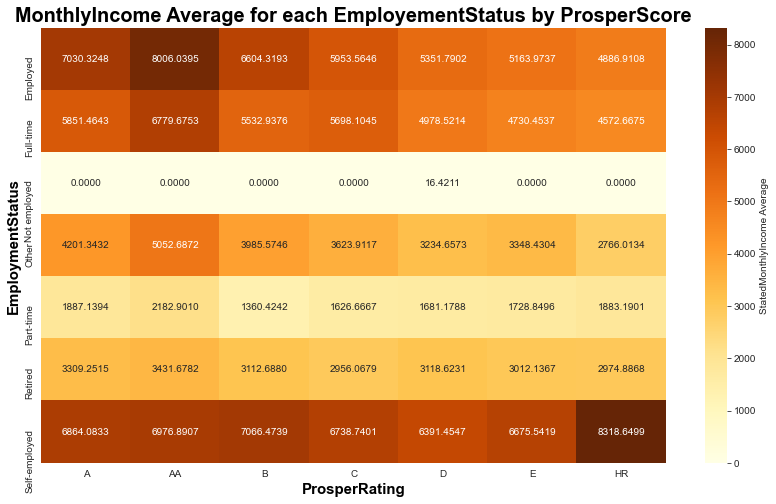

In [68]:
plt.figure(figsize = (14,8))


htpe = dfs.groupby(['ProsperRating', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
htpe = htpe.reset_index(name = 'StatedMonthlyIncome_avg')

htpe = htpe.pivot(index = 'EmploymentStatus', columns = 'ProsperRating', values = 'StatedMonthlyIncome_avg')

sb.heatmap(htpe,  fmt = '.4f', annot = True, cbar_kws = {'label' : 'StatedMonthlyIncome Average'} , cmap = 'YlOrBr');

plt.title('MonthlyIncome Average for each EmployementStatus by ProsperScore' , size = 20 , color = 'black' , weight = 'bold');
plt.xlabel('ProsperRating' , size = 15 , color = 'black' , weight = 'bold');
plt.ylabel('EmploymentStatus' , size = 15 , color = 'black' , weight = 'bold');

**Conclusion:** Self-employed/ProspeRating has the highest overall Stated Monthly Income with the highest Stated Monthly Income (8318) average in 'HR' prosper rating. On the other hand, Not Employed row has the lowest Stated Monthly Income average amoung every prosper rating. Employed Comes next then Full-time.

==================================================================================================

## Multiv / 4: (LoanStatus / BorrowerAPR) for each Prosper Rating

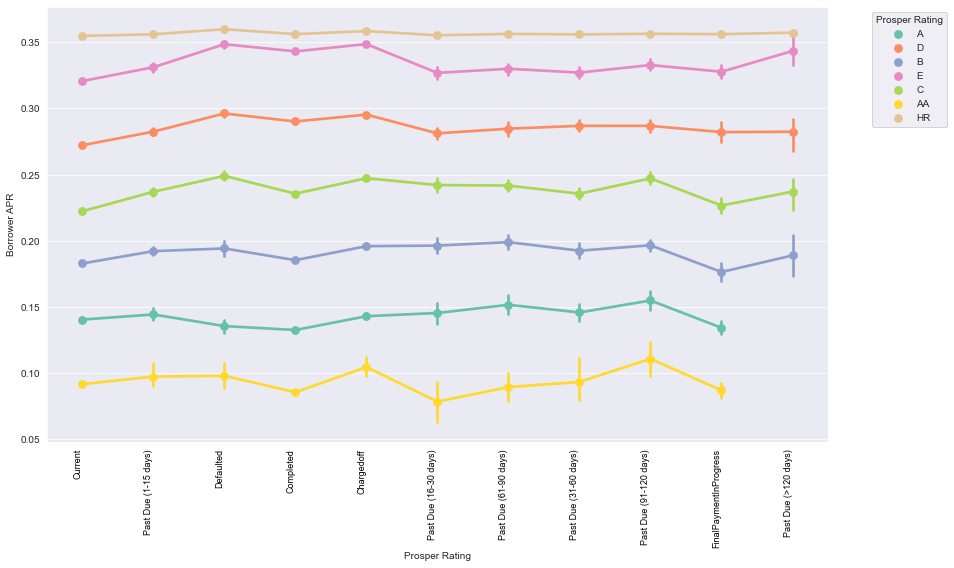

In [67]:
plt.figure(figsize= (14 , 8))
fg = sb.pointplot(data = dfs, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'ProsperRating' , )
#plt.title('Borrower APR vs Employment Status vs Prosper Rating');

#Legend
plt.legend( title='Prosper Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# x-axis label
plt.xlabel('Prosper Rating')


# y-axis label
plt.ylabel('Borrower APR')

#Adjusting ticklabels in a proper manner !
fg.set_xticklabels(fg.get_xticklabels(), rotation=90, ha="right" , size = 9 , color = 'black')
plt.show()

**Conclusion**: 

Borrowings which is under "HR" prosperRating has the highest/stable BorrowerAPR amoung all other ProsperRatings with Avg **BorrowerAPR** **$\geq$** 35% while Borrowings under "AA" ProsperRating fall at the lowest **BorrowerAPR** between 6% and 11% with spikey/unstable Attribues.

==================================================================================================


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I found that Debut Consildation has the highest Loan Original Amounts between other Listing Categories amoung all type of terms exceeding 30,000 Original Loan Amount, 63% of Borrowers have Debut Consildation loan to pay off multiple debts with a new loan or balance transfer credit card—often at a lower interest rate.This resolves into the large number of loans that an individual makes. Full Time Employeed Borrowers have the highest loans between other types of borrowers, this might be a result of the high annual incomes of full time employees.



### Were there any interesting or surprising interactions between features?
ProsperRating , EmploymentStatus and Loan Original Amount have a significant trio relationship. The most intersting part is that Employees have high and stable Monthly Income,Hence Employees who borrow tend to have a safe prosperRate between AA to C and the riskier that rate the lower Monthly Income is. Moreover, Employees tend to have Larger Loan Amount that others, Hence investing into a Loan containing these properties is a **WIN** Investment for the long term -5 years-.
